In [137]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

class Ray:
    def __init__(self, init_info, trajectory):
        self.a = init_info['a']
        self.init_theta = init_info['init_theta']
        self.init_vx = init_info['init_vx']
        self.init_vy = init_info['init_vy']

        self.r_trajectory = trajectory['r']
        self.theta_trajectory = trajectory['theta']
        self.phi_trajectory = trajectory['phi']
        return

rays = []
for fname in os.listdir('./../data/'):
    t = {}
    try:
        t['r'], t['theta'], t['phi'] = np.loadtxt(
            './../data/' + fname, 
            dtype='float', 
            delimiter=',', 
            unpack=True
        )
        l = re.match('.*vx(.*)_vy(.*)_a(.*)_theta(.*)', fname)
        i = {}
        i['init_vx'], i['init_vy'], i['a'], i['init_theta'] = l.groups()
        rays.append(Ray(i, t))
    except:
        continue




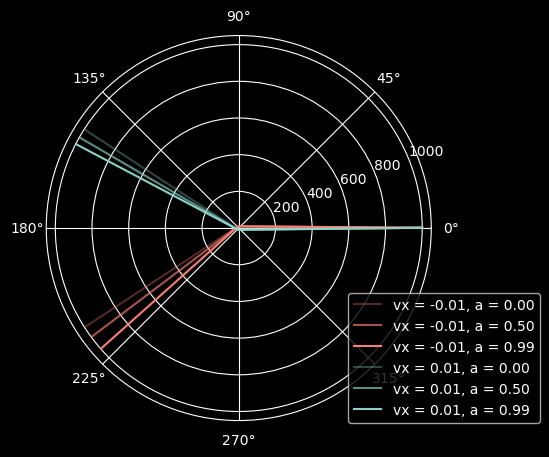

In [147]:
plt.style.use('dark_background')
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'polar'})
fig.set_size_inches(5, 5)
i = 0
for ray in rays:
    i += 1
    # if abs(float(ray.init_vy) - 0) < 1e-5 and 0.052 < float(ray.init_vx) < 0.053 and float(ray.a) == 0:

    s = f'vx = {float(ray.init_vx):.2f}, a = {float(ray.a):.2f}'
    vx = float(ray.init_vx)
    ax.plot(ray.phi_trajectory, ray.r_trajectory, label=s, c=f'C{0 if vx > 0 else 3}', alpha = (float(ray.a) + 0.5) / 1.5)
ax.legend(bbox_to_anchor=(1.3, 0.35))
# ax.set_rlim(0, 100)


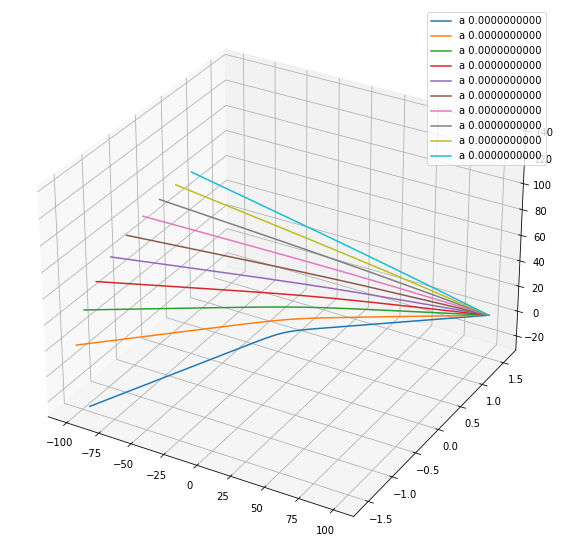

In [101]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
fig.set_size_inches(10, 10)
for ray in rays:
    if abs(float(ray.init_vy) - 0) < 1e-5 or np.random.rand() < 0.:
        continue
    r = ray.r_trajectory
    phi = ray.phi_trajectory
    theta = ray.theta_trajectory
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta) 
    ax.plot(x, y, z, label=f'a {ray.a}')
ax.legend()


Text(0, 0.5, 'a.u.')

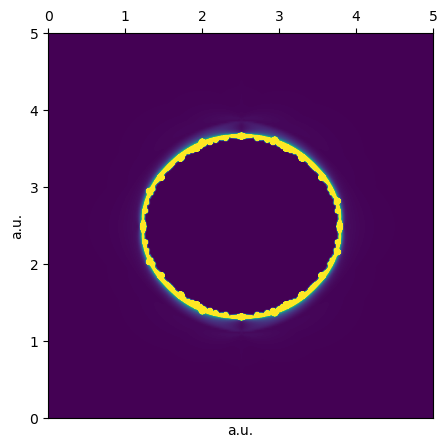

In [60]:

with open('./../data/image') as f:
    str = f.read().replace('\n', '')
ls = str.split(sep=',')
N = 200
skip_center = 2
idx = list(range(0, N//2 - skip_center)) + list(range(N//2 + skip_center, N))
img = np.array([[float(ls[i + N * j]) for i in idx] for j in idx])

# img = np.hstack((np.flip(img, axis=1), img))
# img = np.vstack((np.flip(img, axis=0), img))
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 5)
s = ax.imshow(
    img, 
    vmax=600,
    vmin=0, 
    extent=[0, 5, 0, 5],
    interpolation='Gaussian'
)
ax.xaxis.set_ticks_position('top')
label ='a.u.'
ax.set_xlabel(label)
ax.set_ylabel(label)
# cbar = fig.colorbar(s)
